# NN
## domain 1

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import json
import numpy as np

In [4]:
text = []
label = []

with open("../../data/domain1_train.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        label.append(data["label"])

vector_sample = np.arange(5000)
from sklearn.feature_extraction.text import CountVectorizer

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b")

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())


Vocabulary:  {'0': 0, '1': 1, '2': 1112, '3': 2223, '4': 3334, '5': 4445, '6': 4556, '7': 4667, '8': 4778, '9': 4889, '10': 2, '11': 113, '12': 224, '13': 335, '14': 446, '15': 557, '16': 668, '17': 779, '18': 890, '19': 1001, '20': 1113, '21': 1224, '22': 1335, '23': 1446, '24': 1557, '25': 1668, '26': 1779, '27': 1890, '28': 2001, '29': 2112, '30': 2224, '31': 2335, '32': 2446, '33': 2557, '34': 2668, '35': 2779, '36': 2890, '37': 3001, '38': 3112, '39': 3223, '40': 3335, '41': 3446, '42': 3557, '43': 3668, '44': 3779, '45': 3890, '46': 4001, '47': 4112, '48': 4223, '49': 4334, '50': 4446, '51': 4457, '52': 4468, '53': 4479, '54': 4490, '55': 4501, '56': 4512, '57': 4523, '58': 4534, '59': 4545, '60': 4557, '61': 4568, '62': 4579, '63': 4590, '64': 4601, '65': 4612, '66': 4623, '67': 4634, '68': 4645, '69': 4656, '70': 4668, '71': 4679, '72': 4690, '73': 4701, '74': 4712, '75': 4723, '76': 4734, '77': 4745, '78': 4756, '79': 4767, '80': 4779, '81': 4790, '82': 4801, '83': 4812, '84':

In [5]:
X = vector.toarray()
y = np.array(label).ravel()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (19500, 5000)
Shape of y: (19500,)


## Data splitting

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Building NN

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [8]:

# Define the Neural Network
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

# Assuming your data is loaded into X_train, y_train, X_test, y_test
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Hyperparameters
input_size = 5000
hidden_size = 100
num_classes = 2
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Create an instance of the classifier and define loss and optimizer
model = TextClassifier(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy of the model on test data: {accuracy * 100:.2f}%')


Epoch [1/10], Step [1/156], Loss: 0.6934
Epoch [1/10], Step [101/156], Loss: 0.6728
Epoch [1/10], Step [201/156], Loss: 0.6835
Epoch [1/10], Step [301/156], Loss: 0.6404
Epoch [1/10], Step [401/156], Loss: 0.6463
Epoch [1/10], Step [501/156], Loss: 0.6043
Epoch [1/10], Step [601/156], Loss: 0.6073
Epoch [1/10], Step [701/156], Loss: 0.5982
Epoch [1/10], Step [801/156], Loss: 0.5938
Epoch [1/10], Step [901/156], Loss: 0.5995
Epoch [1/10], Step [1001/156], Loss: 0.5814
Epoch [1/10], Step [1101/156], Loss: 0.5717
Epoch [1/10], Step [1201/156], Loss: 0.5238
Epoch [1/10], Step [1301/156], Loss: 0.5552
Epoch [1/10], Step [1401/156], Loss: 0.5316
Epoch [1/10], Step [1501/156], Loss: 0.4521
Epoch [1/10], Step [1601/156], Loss: 0.4515
Epoch [1/10], Step [1701/156], Loss: 0.4634
Epoch [1/10], Step [1801/156], Loss: 0.4456
Epoch [1/10], Step [1901/156], Loss: 0.4215
Epoch [1/10], Step [2001/156], Loss: 0.4119
Epoch [1/10], Step [2101/156], Loss: 0.4231
Epoch [1/10], Step [2201/156], Loss: 0.3682


### K-fold validation

In [9]:

# Define the Neural Network
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

Epoch [1/10], Step [1/156], Loss: 0.6690
Epoch [1/10], Step [101/156], Loss: 0.6407
Epoch [1/10], Step [201/156], Loss: 0.6015
Epoch [1/10], Step [301/156], Loss: 0.5633
Epoch [1/10], Step [401/156], Loss: 0.5228
Epoch [1/10], Step [501/156], Loss: 0.4693
Epoch [1/10], Step [601/156], Loss: 0.4230
Epoch [1/10], Step [701/156], Loss: 0.3569
Epoch [1/10], Step [801/156], Loss: 0.3214
Epoch [1/10], Step [901/156], Loss: 0.2610
Epoch [1/10], Step [1001/156], Loss: 0.2318
Epoch [1/10], Step [1101/156], Loss: 0.1927
Epoch [1/10], Step [1201/156], Loss: 0.1587
Epoch [1/10], Step [1301/156], Loss: 0.1127
Epoch [1/10], Step [1401/156], Loss: 0.1047
Epoch [1/10], Step [1501/156], Loss: 0.0631
Epoch [1/10], Step [1601/156], Loss: 0.0598
Epoch [1/10], Step [1701/156], Loss: 0.0428
Epoch [1/10], Step [1801/156], Loss: 0.0376
Epoch [1/10], Step [1901/156], Loss: 0.0244
Epoch [1/10], Step [2001/156], Loss: 0.0174
Epoch [1/10], Step [2101/156], Loss: 0.0136
Epoch [1/10], Step [2201/156], Loss: 0.0149


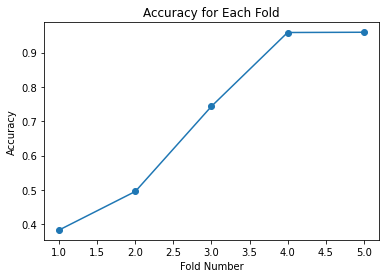

In [10]:


# Assuming your data is loaded into X_train, y_train, X_test, y_test
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Hyperparameters
input_size = 5000
hidden_size = 100
num_classes = 2
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Define KFold Cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits)
accuracies = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    
    # Create an instance of the classifier and define loss and optimizer
    model = TextClassifier(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

    # Evaluate the model
    with torch.no_grad():
        outputs = model(X_val_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)
        accuracies.append(accuracy)


# Plotting the accuracies
plt.plot(range(1, n_splits + 1), accuracies, marker='o')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Fold')
plt.show()


### save best model

In [11]:
save_path = "model_4th_fold_domain2.pth"

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    
    # Split the data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)
    
    # Create an instance of the classifier and define loss and optimizer
    model = TextClassifier(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train_tensor[i:i+batch_size]
            y_batch = y_train_tensor[i:i+batch_size]

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(X_train)//batch_size}], Loss: {loss.item():.4f}')

    # Evaluate the model
    with torch.no_grad():
        outputs = model(X_val_tensor)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y_val_tensor).sum().item() / len(y_val_tensor)
        accuracies.append(accuracy)

    # Save the model after training on the 4th fold
    if fold == 3:  # 0-indexed, so 3 means 4th fold
        torch.save(model.state_dict(), save_path)

# Continue with plotting the accuracies or any other tasks you want to perform after training on all folds.


Epoch [1/10], Step [1/156], Loss: 0.6711
Epoch [1/10], Step [101/156], Loss: 0.6436
Epoch [1/10], Step [201/156], Loss: 0.6165
Epoch [1/10], Step [301/156], Loss: 0.5825
Epoch [1/10], Step [401/156], Loss: 0.5463
Epoch [1/10], Step [501/156], Loss: 0.4936
Epoch [1/10], Step [601/156], Loss: 0.4555
Epoch [1/10], Step [701/156], Loss: 0.4003
Epoch [1/10], Step [801/156], Loss: 0.3684
Epoch [1/10], Step [901/156], Loss: 0.2992
Epoch [1/10], Step [1001/156], Loss: 0.2776
Epoch [1/10], Step [1101/156], Loss: 0.2367
Epoch [1/10], Step [1201/156], Loss: 0.1974
Epoch [1/10], Step [1301/156], Loss: 0.1543
Epoch [1/10], Step [1401/156], Loss: 0.1368
Epoch [1/10], Step [1501/156], Loss: 0.0990
Epoch [1/10], Step [1601/156], Loss: 0.0869
Epoch [1/10], Step [1701/156], Loss: 0.0572
Epoch [1/10], Step [1801/156], Loss: 0.0538
Epoch [1/10], Step [1901/156], Loss: 0.0360
Epoch [1/10], Step [2001/156], Loss: 0.0258
Epoch [1/10], Step [2101/156], Loss: 0.0210
Epoch [1/10], Step [2201/156], Loss: 0.0198


### Predict domian1

In [12]:
# Instantiate the model
loaded_model = TextClassifier(input_size, hidden_size, num_classes)

# Load the saved weights
loaded_model.load_state_dict(torch.load(save_path))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Assuming you've got your test data in X_test
    outputs = loaded_model(test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    # Now `predicted` contains the predicted labels for the test set


In [13]:
text = []
label = []

with open("../../data/test_set.json") as f:
    for line in f:
        # read line by line
        data = json.loads(line)
        
        # add values
        text.append(data["text"])
        #label.append(data["label"])
vector_sample = np.arange(5000)

def toStr(n):
   return str(n)

# Create a Vectorizer Object
vectorizer = CountVectorizer(preprocessor= toStr, analyzer="word", token_pattern=r"(?u)\b\w+\b")

vectorizer.fit(vector_sample)

# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the Document
vector = vectorizer.transform(text)

# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray())

X_predict = vector.toarray()
y_predict = np.array(label).ravel()

print("Shape of X:", X_predict.shape)
print("Shape of y:", y_predict.shape)

Vocabulary:  {'0': 0, '1': 1, '2': 1112, '3': 2223, '4': 3334, '5': 4445, '6': 4556, '7': 4667, '8': 4778, '9': 4889, '10': 2, '11': 113, '12': 224, '13': 335, '14': 446, '15': 557, '16': 668, '17': 779, '18': 890, '19': 1001, '20': 1113, '21': 1224, '22': 1335, '23': 1446, '24': 1557, '25': 1668, '26': 1779, '27': 1890, '28': 2001, '29': 2112, '30': 2224, '31': 2335, '32': 2446, '33': 2557, '34': 2668, '35': 2779, '36': 2890, '37': 3001, '38': 3112, '39': 3223, '40': 3335, '41': 3446, '42': 3557, '43': 3668, '44': 3779, '45': 3890, '46': 4001, '47': 4112, '48': 4223, '49': 4334, '50': 4446, '51': 4457, '52': 4468, '53': 4479, '54': 4490, '55': 4501, '56': 4512, '57': 4523, '58': 4534, '59': 4545, '60': 4557, '61': 4568, '62': 4579, '63': 4590, '64': 4601, '65': 4612, '66': 4623, '67': 4634, '68': 4645, '69': 4656, '70': 4668, '71': 4679, '72': 4690, '73': 4701, '74': 4712, '75': 4723, '76': 4734, '77': 4745, '78': 4756, '79': 4767, '80': 4779, '81': 4790, '82': 4801, '83': 4812, '84':

In [14]:
X_predict

array([[32, 14,  3, ...,  0,  0,  0],
       [ 2, 11,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 7,  1,  0, ...,  0,  0,  0],
       [27, 18,  6, ...,  0,  0,  0]])

In [19]:
# Instantiate the model
loaded_model = TextClassifier(input_size, hidden_size, num_classes)

# Load the saved weights
loaded_model.load_state_dict(torch.load(save_path))

# Set the model to evaluation mode
loaded_model.eval()

# Make predictions
with torch.no_grad():
    test_tensor = torch.tensor(X_predict, dtype=torch.float32)  # Assuming you've got your test data in X_test
    outputs = loaded_model(test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    # Now `predicted` contains the predicted labels for the test set


In [20]:
import csv

# Your tensor
tensor_data = predicted  # Fill in with your tensor data

# Convert tensor to list
data_list = tensor_data.tolist()

# Write to CSV
with open('result_NN_domain2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "class"])
    for idx, value in enumerate(data_list):
        writer.writerow([idx, value])


### Feedback:
1. The accuracy of NN is very high 95% (domain 1 data)
2. prediction accuracy is 64% (by kaggle)